In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

/Users/arjumanbanu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Load data from the Excel file
df = pd.read_excel('Thesis_RechargeDataset_V7copy.xlsx')

In [10]:
# Visualizing the first 6 rows with column head
df.head(6) 

,FID,Lat,Long,GR (Recharge),Precipitation,ET_pot,Prec_seasonality,Temp_seasonality,Aridity,DEM,...,Landuse,Rock type,Recharge fraction,PPT Int. Parameter-a,PPT Int. Parameter-alpha,PPT Int. Parameter-b,PPT Int. Parameter-beta,Scale,Location,Duration
1,0,37.3,-80.1,27,998,1213,11.0,7894.0,1.135838,373,...,14,13,0.027054,10.2166090011597,-0.569130,10.27091,-0.725667,0.948149,0.979379,0.120018
2,1,46.3,-119.9,119,191,1118,43.0,7596.0,5.994595,278,...,12,14,0.623037,10.2166090011597,-0.569130,10.27091,-0.725667,0.948149,0.979379,0.120018
8,7,37.4,116.3,84.6,534,1089,114.0,10329.0,1.981785,55,...,12,14,0.158427,13.2707939147949,-0.621530,5.259001,-0.599323,0.978923,0.975101,0.085029
9,8,-12,135.6,252.7,1395,1608,110.0,1582.0,1.095173,1,...,8,14,0.181147,15.5542602539062,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
10,9,-12,135.6,444.7,1395,1608,110.0,1582.0,1.095173,1,...,8,14,0.318781,15.5542602539062,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
11,10,-12.1,135.6,257,1369,1618,110.0,1645.0,1.155381,1,...,12,14,0.187728,12.5282316207886,-0.421433,7.977501,-0.553530,0.956483,0.990743,0.074722


In [6]:
# Drop rows with any NaN values
df = df.dropna()

In [7]:
# Define features (X) and target (y)
X = df[['PPT Int. Parameter-alpha', 'PPT Int. Parameter-a', 'PPT Int. Parameter-b', 'PPT Int. Parameter-beta', 'Duration', 'Precipitation','ET_pot', 'Prec_seasonality', 'Temp_seasonality', 'Aridity', 'DEM','Depth to water table', 'Depth to bedrock', 'Sand content', 'Clay content','Silt content', 'Slope', 'Topogrpahic wetness index', 'FAPAR ','Landform', 'Landuse', 'Rock type']]

y = df['Recharge fraction']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Compute performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Compute residuals
residuals = y_test - y_pred

R² Score: 0.6631
RMSE: 0.1475


/Users/arjumanbanu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


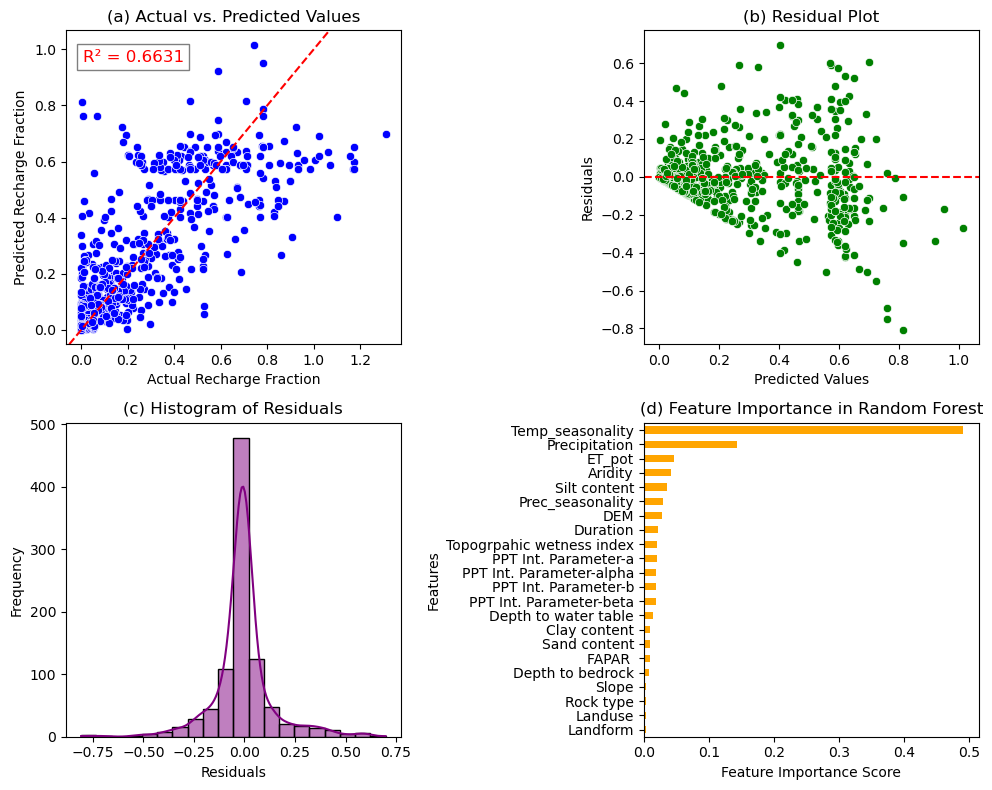

In [9]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Scatter Plot: Actual vs. Predicted Values
sns.scatterplot(ax=axes[0, 0], x=y_test, y=y_pred, color="blue")
axes[0, 0].set_xlabel("Actual Recharge Fraction")
axes[0, 0].set_ylabel("Predicted Recharge Fraction")
axes[0, 0].set_title("(a) Actual vs. Predicted Values")
axes[0, 0].axline([0, 0], [1, 1], color="red", linestyle="--")
axes[0, 0].text(0.05, 0.9, f'R² = {r2:.4f}', transform=axes[0, 0].transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))

#  Residual Plot
sns.scatterplot(ax=axes[0, 1], x=y_pred, y=residuals, color="green")
axes[0, 1].axhline(y=0, color="red", linestyle="--")
axes[0, 1].set_xlabel("Predicted Values")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("(b) Residual Plot")

#  Histogram of Residuals
sns.histplot(residuals, bins=20, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_xlabel("Residuals")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("(c) Histogram of Residuals")

#  Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='orange', ax=axes[1, 1])
axes[1, 1].set_xlabel("Feature Importance Score")
axes[1, 1].set_ylabel("Features")
axes[1, 1].set_title("(d) Feature Importance in Random Forest")

# Adjust layout and show the plot
plt.tight_layout()

# Save the figure 
#plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

